In [350]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report,mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split



In [351]:
pd.read_excel('dataset.xlsx')

,Name,NOB,V,SH,CS,CDR,TD,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT
0,Alarmio-master,22,17,3,169,1.4,1.0,0.364583,2.000000,5.802083,27.260802,3.567901,3.427686,4.367769,21.252630,5.464506,1.968750
1,AndroidAsyncHTTP-master,11,20,14,494,4.7,6.0,0.474684,2.208861,24.006329,25.996479,10.336268,3.172492,2.727170,17.430380,5.158451,2.177215
2,android-pdf-viewer-master,2,1,0,4,0.0,12.2,0.000000,0.500000,1.833333,18.280000,4.560000,1.727273,3.454545,9.666667,2.560000,1.666667
3,android-permission-handler-master,1,1,1,6,0.0,2.1,0.083333,1.000000,4.250000,18.757143,3.385714,3.019608,2.333333,8.833333,3.314286,1.666667
4,Android-WhatsApp-master,0,6,0,253,3.4,4.2,0.036145,2.843373,2.120482,46.416898,16.549861,7.336918,5.704301,10.913580,11.076696,0.903614
5,android-youtubeExtractor-master,4,18,7,100,3.8,3.1,0.200000,1.880000,6.720000,43.434783,2.920290,3.908163,5.020408,18.826090,8.260870,1.840000
6,androidtv-sample-inputs-master,15,3,0,155,3.0,1.0,0.241935,2.491935,8.120968,36.534765,11.452965,3.972868,4.281654,23.250000,5.811861,1.580645
7,BirthdayBuddy-master,1,0,0,69,1.0,0.2,0.000000,0.000000,0.000000,52.708333,1.708333,0.000000,0.000000,0.000000,0.000000,0.000000
8,dex2jar,34,306,43,2000,10.1,1.7,0.500824,3.654036,7.975288,41.952099,5.579882,5.454865,4.075811,17.238180,9.152676,1.507414
9,epubator-master,0,12,8,134,0.0,3.0,0.255319,2.180851,6.063830,19.005579,2.112971,2.749027,3.050584,16.319150,3.418410,1.127660


In [352]:
datasample = pd.read_excel('dataset.xlsx')#read data with pandas library

In [353]:
datasample.head(3) #First 3 samples of the our dataset:

,Name,NOB,V,SH,CS,CDR,TD,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT
0,Alarmio-master,22,17,3,169,1.4,1.0,0.364583,2.000000,5.802083,27.260802,3.567901,3.427686,4.367769,21.252630,5.464506,1.968750
1,AndroidAsyncHTTP-master,11,20,14,494,4.7,6.0,0.474684,2.208861,24.006329,25.996479,10.336268,3.172492,2.727170,17.430380,5.158451,2.177215
2,android-pdf-viewer-master,2,1,0,4,0.0,12.2,0.000000,0.500000,1.833333,18.280000,4.560000,1.727273,3.454545,9.666667,2.560000,1.666667


In [354]:
dist1 = pd.DataFrame(datasample) #selected Number of Bugs(NOB) for distributrion of data
dist1 = dist1[dist1.columns[1]]
dist2 = pd.DataFrame(datasample) #selected RFC for distribution of data
dist2 = dist2[dist2.columns[9]]
dist3 = pd.DataFrame(datasample) #selected Number of Children(NOC) for distribution of data
dist3 = dist3[dist3.columns[7]] 

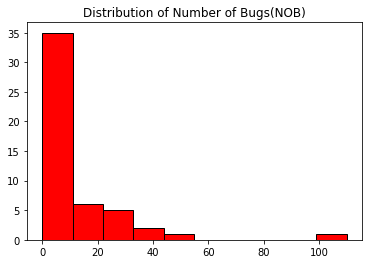

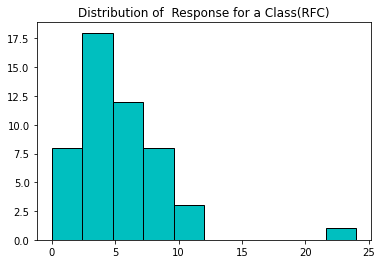

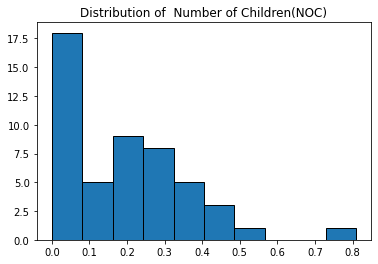

In [355]:
dist1.hist(color = 'r',ec="k" )
plt.grid(b=None)
plt.title('Distribution of Number of Bugs(NOB)')
plt.show()
dist2.hist(color = 'c',ec="k")
plt.grid(b=None)
plt.title('Distribution of  Response for a Class(RFC)')
plt.show()
dist3.hist(ec="k")
plt.grid(b=None)
plt.title('Distribution of  Number of Children(NOC)')
plt.show()

In [356]:
#Min max scaler for all data
scaler = MinMaxScaler()
datasample[datasample.columns[1:17]] = scaler.fit_transform(datasample[datasample.columns[1:17]]) 
datasample

,Name,NOB,V,SH,CS,CDR,TD,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT
0,Alarmio-master,0.200000,0.055556,0.069767,0.0845,0.070707,0.081967,0.450368,0.547340,0.241690,0.328644,0.215585,0.467183,0.678344,0.483014,0.493334,0.904251
1,AndroidAsyncHTTP-master,0.100000,0.065359,0.325581,0.2470,0.237374,0.491803,0.586374,0.604499,1.000000,0.295288,0.624553,0.432401,0.423548,0.396145,0.465703,1.000000
2,android-pdf-viewer-master,0.018182,0.003268,0.000000,0.0020,0.000000,1.000000,0.000000,0.136835,0.076369,0.091712,0.275531,0.235422,0.536514,0.219697,0.231116,0.765504
3,android-permission-handler-master,0.009091,0.003268,0.023256,0.0030,0.000000,0.172131,0.102941,0.273670,0.177037,0.104300,0.204577,0.411564,0.362383,0.200758,0.299212,0.765504
4,Android-WhatsApp-master,0.000000,0.019608,0.000000,0.1265,0.171717,0.344262,0.044649,0.778146,0.088330,0.834019,1.000000,1.000000,0.885917,0.248036,1.000000,0.415032
5,android-youtubeExtractor-master,0.036364,0.058824,0.162791,0.0500,0.191919,0.254098,0.247059,0.514500,0.279926,0.755345,0.176454,0.532671,0.779704,0.427866,0.745788,0.845116
6,androidtv-sample-inputs-master,0.136364,0.009804,0.000000,0.0775,0.151515,0.081967,0.298861,0.681968,0.338284,0.573309,0.692028,0.541490,0.664970,0.528409,0.524693,0.725994
7,BirthdayBuddy-master,0.009091,0.000000,0.000000,0.0345,0.050505,0.016393,0.000000,0.000000,0.000000,1.000000,0.103223,0.000000,0.000000,0.000000,0.000000,0.000000
8,dex2jar,0.309091,1.000000,1.000000,1.0000,0.510101,0.139344,0.618665,1.000000,0.332216,0.716229,0.337156,0.743482,0.633001,0.391777,0.826300,0.692359
9,epubator-master,0.000000,0.039216,0.186047,0.0670,0.000000,0.245902,0.315394,0.596833,0.252593,0.110854,0.127673,0.374684,0.473776,0.370890,0.308613,0.517937


# Part1 (Statistical Correlation Analysis)

In [357]:
#Show the correlation matrix of all metrics

corre = datasample.corr(method = 'spearman')#the defaults is pearson but we need spearman method
print('\t\tCorrelation Matrix of All Metrics')
corre

		Correlation Matrix of All Metrics


,NOB,V,SH,CS,CDR,TD,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT
NOB,1.000000,0.694733,0.587592,0.691274,0.373251,0.133383,0.407858,0.353351,0.447180,0.349883,0.369028,0.458483,0.277107,0.062748,0.507420,0.245963
V,0.694733,1.000000,0.629663,0.624194,0.280358,0.296757,0.409002,0.426221,0.345986,0.243636,0.208594,0.468565,0.289585,0.029765,0.397770,0.110767
SH,0.587592,0.629663,1.000000,0.618509,0.384657,-0.026546,0.512876,0.391886,0.425499,0.129174,0.204069,0.278723,0.156120,-0.016116,0.349367,0.107688
CS,0.691274,0.624194,0.618509,1.000000,0.548113,0.194611,0.402859,0.577439,0.492868,0.440458,0.260596,0.456943,0.388502,0.065511,0.569857,0.218801
CDR,0.373251,0.280358,0.384657,0.548113,1.000000,0.013400,0.192707,0.212007,0.240992,0.328527,0.171773,0.243709,0.237237,-0.038683,0.343628,0.123330
TD,0.133383,0.296757,-0.026546,0.194611,0.013400,1.000000,-0.179659,0.013652,-0.126364,-0.031098,0.114297,0.239077,0.240135,0.017159,0.127638,0.352010
NOC,0.407858,0.409002,0.512876,0.402859,0.192707,-0.179659,1.000000,0.667344,0.584086,-0.120165,0.297347,0.268289,-0.074350,-0.013518,0.173468,-0.163788
CBO,0.353351,0.426221,0.391886,0.577439,0.212007,0.013652,0.667344,1.000000,0.421247,0.177024,0.250408,0.594578,0.240953,0.109694,0.492616,0.000144
RFC,0.447180,0.345986,0.425499,0.492868,0.240992,-0.126364,0.584086,0.421247,1.000000,0.134608,0.381636,0.414878,0.072564,0.444076,0.529367,0.237368
LOC,0.349883,0.243636,0.129174,0.440458,0.328527,-0.031098,-0.120165,0.177024,0.134608,1.000000,0.126681,0.554326,0.618676,-0.065455,0.678224,0.181072


In [358]:
#P values of Spearman Correlation Table
from scipy.stats import spearmanr
def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(spearmanr(df[r], df[c])[1],4)
    return pvalues
a = calculate_pvalues(datasample)
a.iloc[:,0:17] = a.iloc[:,0:17].astype(float)
a

,NOB,V,SH,CS,CDR,TD,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT
NOB,0.0000,0.0000,0.0000,0.0000,0.0076,0.3558,0.0033,0.0118,0.0011,0.0127,0.0084,0.0008,0.0514,0.6651,0.0002,0.0851
V,0.0000,0.0000,0.0000,0.0000,0.0486,0.0364,0.0032,0.0020,0.0138,0.0882,0.1460,0.0006,0.0414,0.8374,0.0042,0.4438
SH,0.0000,0.0000,0.0000,0.0000,0.0058,0.8548,0.0001,0.0049,0.0021,0.3713,0.1552,0.0500,0.2790,0.9115,0.0129,0.4566
CS,0.0000,0.0000,0.0000,0.0000,0.0000,0.1756,0.0037,0.0000,0.0003,0.0014,0.0676,0.0009,0.0053,0.6513,0.0000,0.1269
CDR,0.0076,0.0486,0.0058,0.0000,0.0000,0.9264,0.1800,0.1394,0.0918,0.0198,0.2330,0.0881,0.0971,0.7897,0.0146,0.3935
TD,0.3558,0.0364,0.8548,0.1756,0.9264,0.0000,0.2119,0.9250,0.3819,0.8302,0.4293,0.0945,0.0930,0.9059,0.3771,0.0122
NOC,0.0033,0.0032,0.0001,0.0037,0.1800,0.2119,0.0000,0.0000,0.0000,0.4058,0.0360,0.0596,0.6078,0.9258,0.2283,0.2557
CBO,0.0118,0.0020,0.0049,0.0000,0.1394,0.9250,0.0000,0.0000,0.0023,0.2188,0.0794,0.0000,0.0919,0.4483,0.0003,0.9992
RFC,0.0011,0.0138,0.0021,0.0003,0.0918,0.3819,0.0000,0.0023,0.0000,0.3513,0.0062,0.0027,0.6165,0.0012,0.0001,0.0970
LOC,0.0127,0.0882,0.3713,0.0014,0.0198,0.8302,0.4058,0.2188,0.3513,0.0000,0.3807,0.0000,0.0000,0.6515,0.0000,0.2082


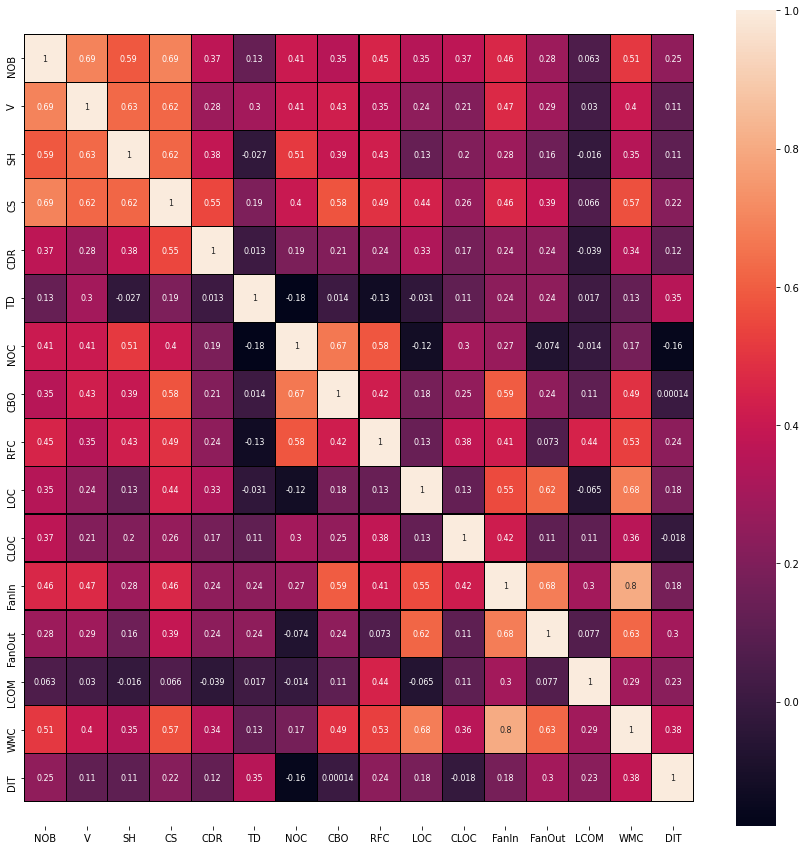

In [359]:
#If you want to see heatmap of the correlation matrix, you can launch code below:
correlation_matrix = datasample.corr(method='spearman')
fig, ax = plt.subplots(figsize=(15,15)) 
ax = sns.heatmap(correlation_matrix, annot=True,linewidths =.1,linecolor='black',annot_kws={"size":8},ax=ax)
bottom,top = ax.get_ylim()
ax.set_ylim(bottom+0.5,top - 0.5)
plt.show()

In [360]:
#Correlation between External Metrics & TD
intervals = datasample[['NOB','V','SH','CS','CDR','TD']]
correlation_matrix = intervals.corr(method = 'spearman')
print("Correlation between External Metrics & TD")
correlation_matrix

Correlation between External Metrics & TD


,NOB,V,SH,CS,CDR,TD
NOB,1.000000,0.694733,0.587592,0.691274,0.373251,0.133383
V,0.694733,1.000000,0.629663,0.624194,0.280358,0.296757
SH,0.587592,0.629663,1.000000,0.618509,0.384657,-0.026546
CS,0.691274,0.624194,0.618509,1.000000,0.548113,0.194611
CDR,0.373251,0.280358,0.384657,0.548113,1.000000,0.013400
TD,0.133383,0.296757,-0.026546,0.194611,0.013400,1.000000


In [361]:
#Correlation between Internal Metrics & TD
externals = datasample[['CDR','TD','NOC','CBO','RFC','LOC','CLOC','FanIn','FanOut','LCOM','WMC','DIT',]]
correlation_matrix = externals.corr(method = 'spearman')
print("Correlation between Internal Metrics & TD")
correlation_matrix

Correlation between Internal Metrics & TD


,CDR,TD,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT
CDR,1.000000,0.013400,0.192707,0.212007,0.240992,0.328527,0.171773,0.243709,0.237237,-0.038683,0.343628,0.123330
TD,0.013400,1.000000,-0.179659,0.013652,-0.126364,-0.031098,0.114297,0.239077,0.240135,0.017159,0.127638,0.352010
NOC,0.192707,-0.179659,1.000000,0.667344,0.584086,-0.120165,0.297347,0.268289,-0.074350,-0.013518,0.173468,-0.163788
CBO,0.212007,0.013652,0.667344,1.000000,0.421247,0.177024,0.250408,0.594578,0.240953,0.109694,0.492616,0.000144
RFC,0.240992,-0.126364,0.584086,0.421247,1.000000,0.134608,0.381636,0.414878,0.072564,0.444076,0.529367,0.237368
LOC,0.328527,-0.031098,-0.120165,0.177024,0.134608,1.000000,0.126681,0.554326,0.618676,-0.065455,0.678224,0.181072
CLOC,0.171773,0.114297,0.297347,0.250408,0.381636,0.126681,1.000000,0.416789,0.109636,0.107619,0.355080,-0.017867
FanIn,0.243709,0.239077,0.268289,0.594578,0.414878,0.554326,0.416789,1.000000,0.679297,0.296355,0.802910,0.179395
FanOut,0.237237,0.240135,-0.074350,0.240953,0.072564,0.618676,0.109636,0.679297,1.000000,0.076982,0.626327,0.295389
LCOM,-0.038683,0.017159,-0.013518,0.109694,0.444076,-0.065455,0.107619,0.296355,0.076982,1.000000,0.291312,0.229251


# Part2 (ML Modelling)



We are going to use 5 different ML Regression Models to predict Technical Debt values:

>Linear Regression

>Support Vector Regression

>Decision Tree Regression

>Random Forest Tree Regression

>Multi-layer Perceptron

70% of our data will be used as training set and 30% as test set. Training and test sets will be randomly. The “random_state” variable will have a fixed value so that all models get the same random data. In this way, we will be able to evaluate the success rate of the different models objectively.


In [362]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import NearestCentroid
from sklearn.preprocessing import StandardScaler

def linearRegression(X_train,y_train,X_test,y_test):
    
    linmod2 = LinearRegression()
    linmod2.fit(X_train,y_train)
    y_pred = linmod2.predict(X_test)
    ax = sns.scatterplot(x=y_test,y=y_test,color='red')
    ax = sns.scatterplot(x=y_test,y=y_pred,color = 'blue')
    ax.legend(["Original Values","Predicted Values"],loc = 'upper left')
    rmse = mean_squared_error(y_test, y_pred,squared = False)
    plt.show()
    print("\n")
    print(" Linear Regression R- Squared Value: ",r2_score(y_test,y_pred)) 
    print(" Linear Regression Root Mean Squared Error: ",rmse) 
    print("\n")
def svrRegressionKernel(X_train,y_train,X_test,y_test):          
    ###kernel type
    svr_linear = SVR(kernel = 'linear')
    svr_linear.fit(X_train,y_train)
    svr_linear.predict([X_test[0]])
    y_pred_test = svr_linear.predict(X_test)
    y_pred_train = svr_linear.predict(X_train)
    
    r2 = r2_score(y_test,y_pred_test)
    
    rmse = mean_squared_error(y_test, y_pred_test,squared = False)
    
    ax = sns.scatterplot(x=y_test,y=y_pred_test,color = 'blue')
    ax = sns.scatterplot(x=y_test,y=y_test,color = 'r')
   
    ax.legend(["Predicted Values","Original Values"],loc = 'upper left')
    plt.show()
    print(" SVR-Linear Kernel Regression R- Squared Value: ", r2)
    print(" SVR-Linear Kernel Root Mean Squared Error: ", rmse)
    print("\n")
def svrRegressionRBF(X_train,y_train,X_test,y_test):  
    
    svr_rbf = SVR(kernel = 'rbf')
    svr_rbf.fit(X_train,y_train)
    y_pred_rbf = svr_rbf.predict(X_test)
    ax = sns.scatterplot(x=y_test,y=y_pred_rbf,color = 'blue')
    ax = sns.scatterplot(x=y_test,y=y_test,color = 'r')
    ax.legend(["Predicted Values","Original Values"],loc = 'upper left')
    r2 = r2_score(y_test,y_pred_rbf)
    
    rmse = mean_squared_error(y_test, y_pred_rbf,squared = False)
    plt.show()
    print("")
    print(" SVR-RBF Kernel Regression R- Squared Value: ",r2)
    print(" SVR-RBF Kernel Regression Root Mean Squared Error: ",rmse)
    print("\n")
def decisionTreeRegression(X_train,y_train,X_test,y_test):
  
    dec = DecisionTreeRegressor()
    dec.fit(X_train, y_train)
    y_pred = dec.predict(X_test)
    ax = sns.scatterplot(x=y_test,y=y_test,color='red')
    ax = sns.scatterplot(x=y_test,y=y_pred,color = 'blue')
    ax.legend(["Original Values","Predicted Values"],loc = 'upper left')
    plt.show()
    rmse = mean_squared_error(y_test, y_pred,squared = False)
    print(" Decision Tree Regression R- Squared Value: ",r2_score(y_test,y_pred)) 
    print(" Decision Tree Regression Root Mean Squared Error: ",rmse) 
    print("\n")
def randomDecTreeRegression(X_train,y_train,X_test,y_test):
    
    
    regressor = RandomForestRegressor()
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    ax = sns.scatterplot(x=y_test,y=y_pred,color = 'blue')
    ax = sns.scatterplot(x=y_test,y=y_test,color = 'r')
    ax.legend(["Predicted Values","Original Values"],loc = 'upper left')
    r2 = r2_score(y_test,y_pred)
    
    rmse = mean_squared_error(y_test, y_pred,squared = False)
    plt.show()
    print(" Random Forest Regression R- Squared Value: ",r2)
    print(" Random Forest Regression Root Mean Squared Error: ",rmse)
    print("\n")
#Multi-layer Perceptron regressor: 'This model optimizes the squared-loss using LBFGS or stochastic gradient descent.'
def mlpRegressor(X_train,y_train,X_test,y_test):
    mlpregressor = MLPRegressor()
    mlpregressor.fit(X_train,y_train)
    y_pred = mlpregressor.predict(X_test)
    ax = sns.scatterplot(x=y_test,y=y_pred,color = 'blue')
    ax = sns.scatterplot(x=y_test,y=y_test,color = 'r')
    ax.legend(["Predicted Values","Original Values"],loc = 'upper left')
    r2 = r2_score(y_test,y_pred)
    
    rmse = mean_squared_error(y_test, y_pred,squared = False)
    plt.show()
    print("Multi-layer Perceptron Regression R- Squared Value: ",r2)
    print("Multi-layer Perceptron Regression Root Mean Squared Error: ",rmse)
    print("\n")

In this step (step 3), we will try to estimate Technical Debt using internal metrics.

In [363]:
#split data into train and test data
x1=datasample.iloc[:,7:17].values
y1=datasample.iloc[:,6].values #TD values
x2=datasample.iloc[:,7:17].values
y2=datasample.iloc[:,5].values #CDR values

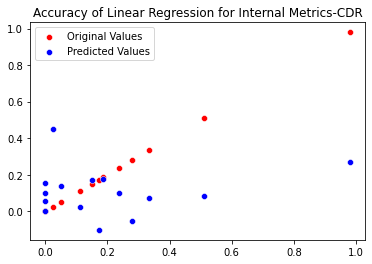



 Linear Regression R- Squared Value:  -0.25353936900603125
 Linear Regression Root Mean Squared Error:  0.2822820349754405




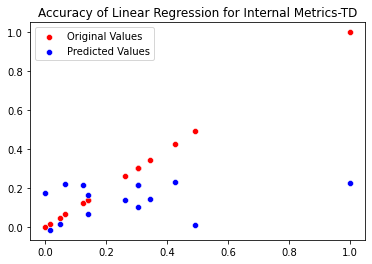



 Linear Regression R- Squared Value:  -0.17296753046920776
 Linear Regression Root Mean Squared Error:  0.26506407767604295




In [364]:
#Model for Linear Regression (show also R-Squared Value and Root Mean Squared Error )
plt.title("Accuracy of Linear Regression for Internal Metrics-CDR")
X_train, X_test, y_train, y_test = train_test_split(x2,y2, train_size = 0.70,test_size=0.30, random_state=53)
linearRegression(X_train,y_train,X_test,y_test) #for CDR
plt.title("Accuracy of Linear Regression for Internal Metrics-TD")
X_train, X_test, y_train, y_test = train_test_split(x1,y1, train_size = 0.70,test_size=0.30, random_state=53)
linearRegression(X_train,y_train,X_test,y_test) #for TD

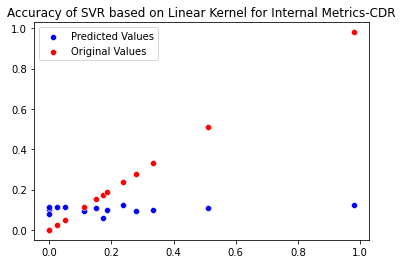

 SVR-Linear Kernel Regression R- Squared Value:  -0.12212300389682662
 SVR-Linear Kernel Root Mean Squared Error:  0.2670757664434763




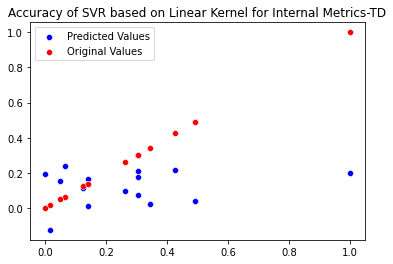

 SVR-Linear Kernel Regression R- Squared Value:  -0.3526354995047598
 SVR-Linear Kernel Root Mean Squared Error:  0.2846415332813681




In [365]:
#Model for SVR Regression  (show also R-Squared Value and Root Mean Squared Error )
plt.title("Accuracy of SVR based on Linear Kernel for Internal Metrics-CDR")
X_train, X_test, y_train, y_test = train_test_split(x2,y2,test_size=0.30, random_state=53)
svrRegressionKernel(X_train,y_train,X_test,y_test)
plt.title("Accuracy of SVR based on Linear Kernel for Internal Metrics-TD")
X_train, X_test, y_train, y_test = train_test_split(x1,y1,test_size=0.30, random_state=53)
svrRegressionKernel(X_train,y_train,X_test,y_test)

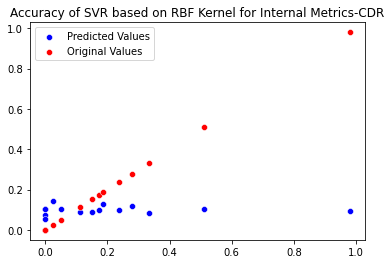


 SVR-RBF Kernel Regression R- Squared Value:  -0.16455641994479597
 SVR-RBF Kernel Regression Root Mean Squared Error:  0.2720786834980814




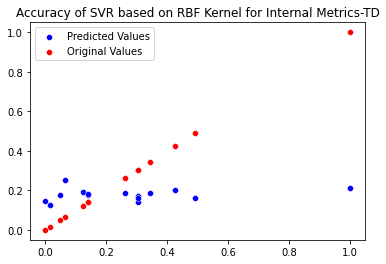


 SVR-RBF Kernel Regression R- Squared Value:  -0.07658669531666251
 SVR-RBF Kernel Regression Root Mean Squared Error:  0.25394074173641473




In [366]:
#Model for SVR Regression  (show also R-Squared Value and Root Mean Squared Error )
plt.title("Accuracy of SVR based on RBF Kernel for Internal Metrics-CDR")
X_train, X_test, y_train, y_test = train_test_split(x2,y2,test_size=0.30, random_state=53)
svrRegressionRBF(X_train,y_train,X_test,y_test)
plt.title("Accuracy of SVR based on RBF Kernel for Internal Metrics-TD")
X_train, X_test, y_train, y_test = train_test_split(x1,y1,test_size=0.30, random_state=53)
svrRegressionRBF(X_train,y_train,X_test,y_test)

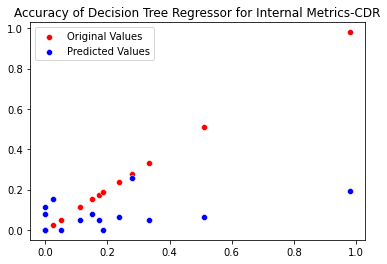

 Decision Tree Regression R- Squared Value:  -0.07375596114953398
 Decision Tree Regression Root Mean Squared Error:  0.26125646398149016




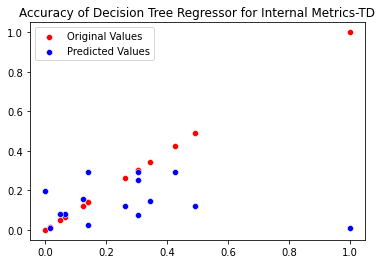

 Decision Tree Regression R- Squared Value:  -0.47895749623617845
 Decision Tree Regression Root Mean Squared Error:  0.297636182816385




In [367]:
#Model for Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error )
plt.title("Accuracy of Decision Tree Regressor for Internal Metrics-CDR")
X_train, X_test, y_train, y_test = train_test_split(x2,y2,test_size=0.30, random_state=53)
decisionTreeRegression(X_train,y_train,X_test,y_test)
plt.title("Accuracy of Decision Tree Regressor for Internal Metrics-TD")
X_train, X_test, y_train, y_test = train_test_split(x1,y1,test_size=0.30, random_state=53)
decisionTreeRegression(X_train,y_train,X_test,y_test)

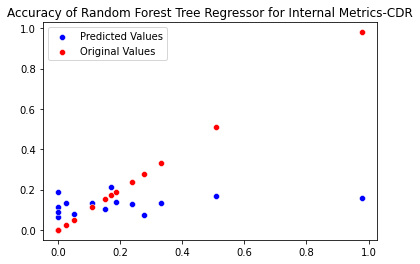

 Random Forest Regression R- Squared Value:  -0.01324716968008599
 Random Forest Regression Root Mean Squared Error:  0.2537885066243469




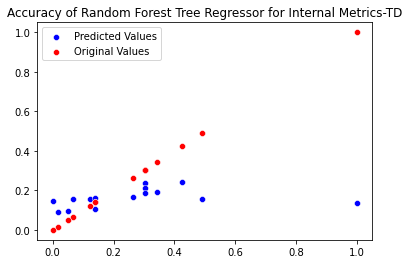

 Random Forest Regression R- Squared Value:  -0.10978596318932743
 Random Forest Regression Root Mean Squared Error:  0.25782646450918856




In [368]:
#Model for Random Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error )
plt.title("Accuracy of Random Forest Tree Regressor for Internal Metrics-CDR")
X_train, X_test, y_train, y_test = train_test_split(x2,y2, train_size = 0.70,test_size=0.30, random_state=53)
randomDecTreeRegression(X_train,y_train,X_test,y_test) #for CDR
plt.title("Accuracy of Random Forest Tree Regressor for Internal Metrics-TD")
X_train, X_test, y_train, y_test = train_test_split(x1,y1, train_size = 0.70,test_size=0.30, random_state=53)
randomDecTreeRegression(X_train,y_train,X_test,y_test) #for TD

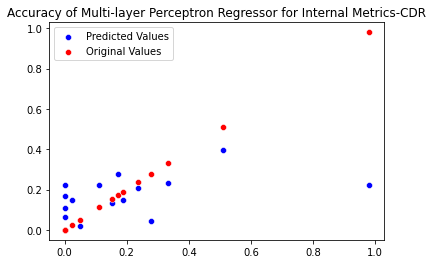

Multi-layer Perceptron Regression R- Squared Value:  0.17092420156975208
Multi-layer Perceptron Regression Root Mean Squared Error:  0.2295680099499871




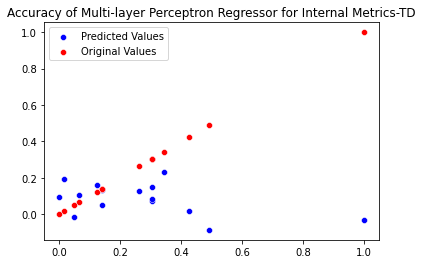

Multi-layer Perceptron Regression R- Squared Value:  -0.9718823977250481
Multi-layer Perceptron Regression Root Mean Squared Error:  0.3436753508462865




In [369]:
#Model for Multi-layer Perceptron Regressor (show also R-Squared Value and Root Mean Squared Error )
plt.title("Accuracy of Multi-layer Perceptron Regressor for Internal Metrics-CDR")
X_train, X_test, y_train, y_test = train_test_split(x2,y2, train_size = 0.70,test_size=0.30, random_state=53)
mlpRegressor(X_train,y_train,X_test,y_test) #for CDR
plt.title("Accuracy of Multi-layer Perceptron Regressor for Internal Metrics-TD")
X_train, X_test, y_train, y_test = train_test_split(x1,y1, train_size = 0.70,test_size=0.30, random_state=53)
mlpRegressor(X_train,y_train,X_test,y_test) #for TD

In this step (step 4), we will try to estimate Technical Debt using external metrics.

In [370]:
#split data into train and test data
x1=datasample.iloc[:,1:5].values
y1=datasample.iloc[:,6].values #TD values
x2=datasample.iloc[:,1:5].values
y2=datasample.iloc[:,5].values #CDR values

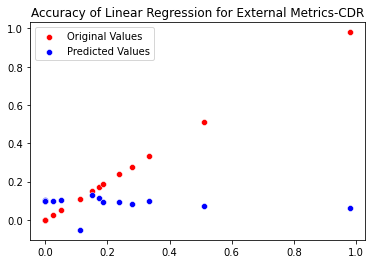



 Linear Regression R- Squared Value:  -0.29877407933861844
 Linear Regression Root Mean Squared Error:  0.2873300555429503




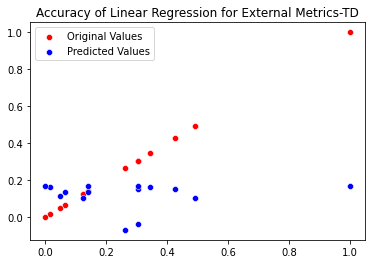



 Linear Regression R- Squared Value:  -0.4331628534217624
 Linear Regression Root Mean Squared Error:  0.2929919249634493




In [371]:
#Model for Linear Regression (show also R-Squared Value and Root Mean Squared Error )
plt.title("Accuracy of Linear Regression for External Metrics-CDR")
X_train, X_test, y_train, y_test = train_test_split(x2,y2, train_size = 0.70,test_size=0.30, random_state=53)
linearRegression(X_train,y_train,X_test,y_test) #for CDR
plt.title("Accuracy of Linear Regression for External Metrics-TD")
X_train, X_test, y_train, y_test = train_test_split(x1,y1, train_size = 0.70,test_size=0.30, random_state=53)
linearRegression(X_train,y_train,X_test,y_test) #for TD

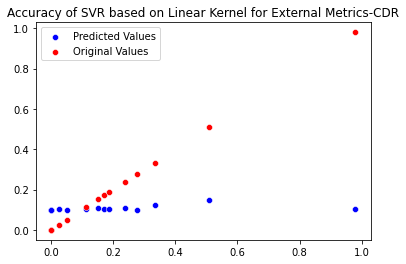

 SVR-Linear Kernel Regression R- Squared Value:  -0.10105796501066222
 SVR-Linear Kernel Root Mean Squared Error:  0.2645570517029422




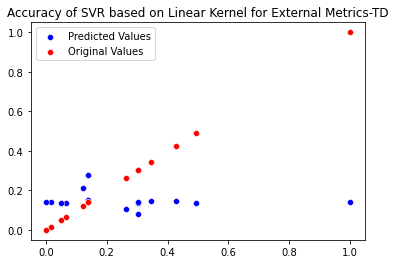

 SVR-Linear Kernel Regression R- Squared Value:  -0.3170558678590276
 SVR-Linear Kernel Root Mean Squared Error:  0.28087299055485854




In [372]:
#Model for SVR (show also R-Squared Value and Root Mean Squared Error )
plt.title("Accuracy of SVR based on Linear Kernel for External Metrics-CDR")
X_train, X_test, y_train, y_test = train_test_split(x2,y2,test_size=0.30, random_state=53)
svrRegressionKernel(X_train,y_train,X_test,y_test)
plt.title("Accuracy of SVR based on Linear Kernel for External Metrics-TD")
X_train, X_test, y_train, y_test = train_test_split(x1,y1,test_size=0.30, random_state=53)
svrRegressionKernel(X_train,y_train,X_test,y_test)

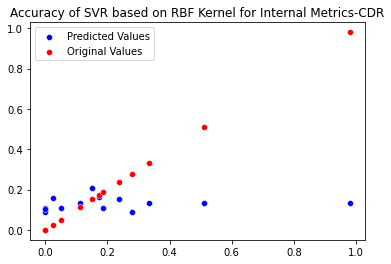


 SVR-RBF Kernel Regression R- Squared Value:  -0.05742000726843233
 SVR-RBF Kernel Regression Root Mean Squared Error:  0.2592614897703499




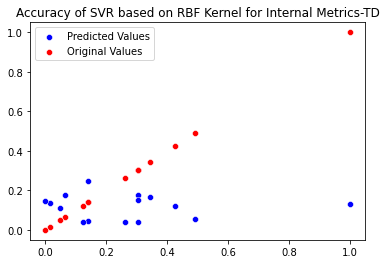


 SVR-RBF Kernel Regression R- Squared Value:  -0.45281551449179935
 SVR-RBF Kernel Regression Root Mean Squared Error:  0.2949939533353097




In [373]:
#Model for SVR Regression  (show also R-Squared Value and Root Mean Squared Error )
plt.title("Accuracy of SVR based on RBF Kernel for Internal Metrics-CDR")
X_train, X_test, y_train, y_test = train_test_split(x2,y2,test_size=0.30, random_state=53)
svrRegressionRBF(X_train,y_train,X_test,y_test)
plt.title("Accuracy of SVR based on RBF Kernel for Internal Metrics-TD")
X_train, X_test, y_train, y_test = train_test_split(x1,y1,test_size=0.30, random_state=53)
svrRegressionRBF(X_train,y_train,X_test,y_test)

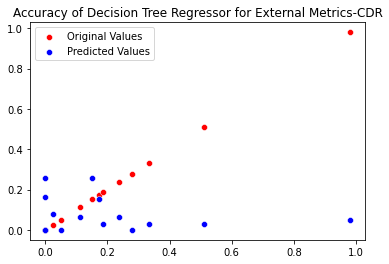

 Decision Tree Regression R- Squared Value:  -0.49827719657436775
 Decision Tree Regression Root Mean Squared Error:  0.3086102422213462




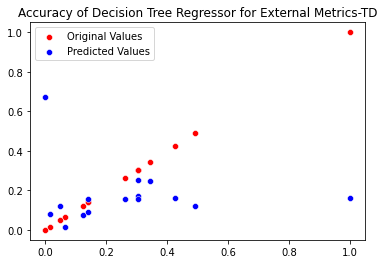

 Decision Tree Regression R- Squared Value:  -0.5974804829655922
 Decision Tree Regression Root Mean Squared Error:  0.3093325772941426




In [374]:
#Model for Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error )
plt.title("Accuracy of Decision Tree Regressor for External Metrics-CDR")
X_train, X_test, y_train, y_test = train_test_split(x2,y2,test_size=0.30, random_state=53)
decisionTreeRegression(X_train,y_train,X_test,y_test)
plt.title("Accuracy of Decision Tree Regressor for External Metrics-TD")
X_train, X_test, y_train, y_test = train_test_split(x1,y1,test_size=0.30, random_state=53)
decisionTreeRegression(X_train,y_train,X_test,y_test)

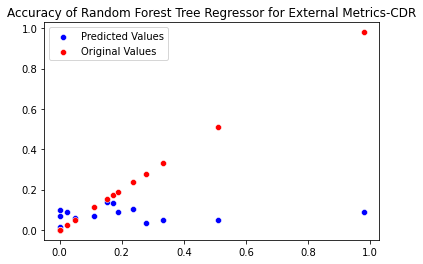

 Random Forest Regression R- Squared Value:  -0.2520338298580018
 Random Forest Regression Root Mean Squared Error:  0.28211246936500445




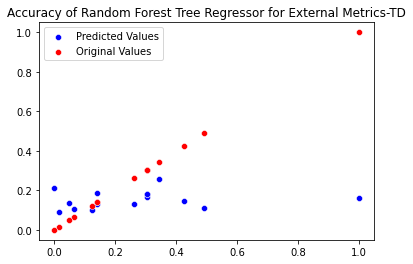

 Random Forest Regression R- Squared Value:  -0.18682297674656212
 Random Forest Regression Root Mean Squared Error:  0.26662499013520335




In [375]:
#Model for Random Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error )
plt.title("Accuracy of Random Forest Tree Regressor for External Metrics-CDR")
X_train, X_test, y_train, y_test = train_test_split(x2,y2, train_size = 0.70,test_size=0.30, random_state=53)
randomDecTreeRegression(X_train,y_train,X_test,y_test) #for CDR
plt.title("Accuracy of Random Forest Tree Regressor for External Metrics-TD")
X_train, X_test, y_train, y_test = train_test_split(x1,y1, train_size = 0.70,test_size=0.30, random_state=53)
randomDecTreeRegression(X_train,y_train,X_test,y_test) #for TD

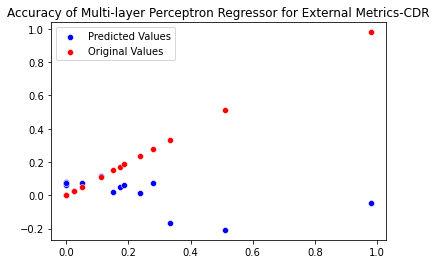

Multi-layer Perceptron Regression R- Squared Value:  -1.07495831745738
Multi-layer Perceptron Regression Root Mean Squared Error:  0.363177503546503




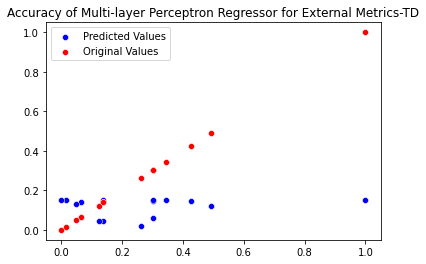

Multi-layer Perceptron Regression R- Squared Value:  -0.34585440696636605
Multi-layer Perceptron Regression Root Mean Squared Error:  0.28392714800246266




In [376]:
#Model for Multi-layer Perceptron Regressor (show also R-Squared Value and Root Mean Squared Error )
plt.title("Accuracy of Multi-layer Perceptron Regressor for External Metrics-CDR")
X_train, X_test, y_train, y_test = train_test_split(x2,y2, train_size = 0.70,test_size=0.30, random_state=53)
mlpRegressor(X_train,y_train,X_test,y_test) #for CDR
plt.title("Accuracy of Multi-layer Perceptron Regressor for External Metrics-TD")
X_train, X_test, y_train, y_test = train_test_split(x1,y1, train_size = 0.70,test_size=0.30, random_state=53)
mlpRegressor(X_train,y_train,X_test,y_test) #for TD

In this step 5, we will try to estimate Technical Debt using all internal and external metrics.

In [377]:
#split data into train and test data
x1=datasample.drop(['Name','CDR','TD'],axis=1).values
y1=datasample.iloc[:,6].values #TD values
x2=datasample.drop(['Name','CDR','TD'],axis=1).values
y2=datasample.iloc[:,5].values #CDR values

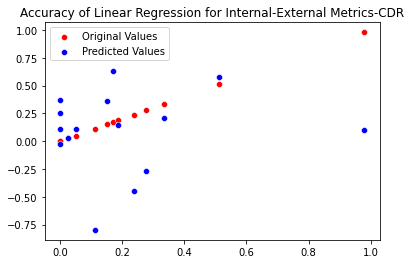



 Linear Regression R- Squared Value:  -2.0091415912957946
 Linear Regression Root Mean Squared Error:  0.437356476698446




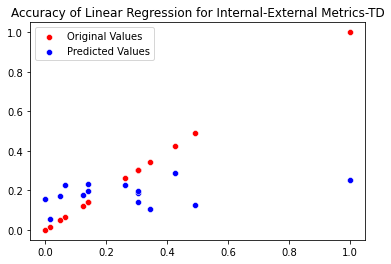



 Linear Regression R- Squared Value:  -0.003633279100096809
 Linear Regression Root Mean Squared Error:  0.24518585195724782




In [378]:
#Model for Linear Regression (show also R-Squared Value and Root Mean Squared Error )
plt.title("Accuracy of Linear Regression for Internal-External Metrics-CDR")
X_train, X_test, y_train, y_test = train_test_split(x2,y2,train_size = 0.70, test_size=0.30, random_state=53)
linearRegression(X_train,y_train,X_test,y_test) #for CDR
plt.title("Accuracy of Linear Regression for Internal-External Metrics-TD")
X_train, X_test, y_train, y_test = train_test_split(x1,y1,train_size = 0.70,test_size=0.30, random_state=53)
linearRegression(X_train,y_train,X_test,y_test) #for TD

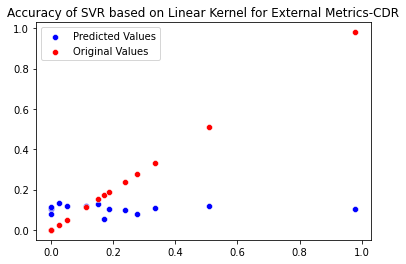

 SVR-Linear Kernel Regression R- Squared Value:  -0.1605709781449498
 SVR-Linear Kernel Root Mean Squared Error:  0.2716127193456499




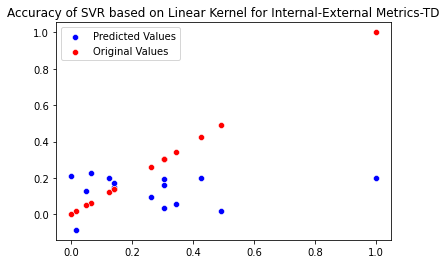

 SVR-Linear Kernel Regression R- Squared Value:  -0.36281172246930304
 SVR-Linear Kernel Root Mean Squared Error:  0.2857102425477753




In [379]:
#Model for SVR (show also R-Squared Value and Root Mean Squared Error )
plt.title("Accuracy of SVR based on Linear Kernel for External Metrics-CDR")
X_train, X_test, y_train, y_test = train_test_split(x2,y2,test_size=0.30, random_state=53)
svrRegressionKernel(X_train,y_train,X_test,y_test)
plt.title("Accuracy of SVR based on Linear Kernel for Internal-External Metrics-TD")
X_train, X_test, y_train, y_test = train_test_split(x1,y1,test_size=0.30, random_state=53)
svrRegressionKernel(X_train,y_train,X_test,y_test)

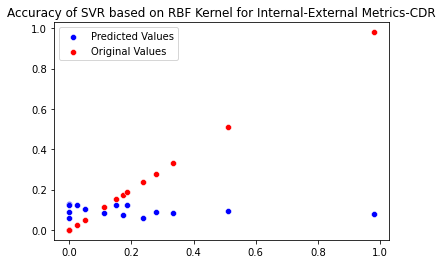


 SVR-RBF Kernel Regression R- Squared Value:  -0.23945919966775864
 SVR-RBF Kernel Regression Root Mean Squared Error:  0.2806922153718834




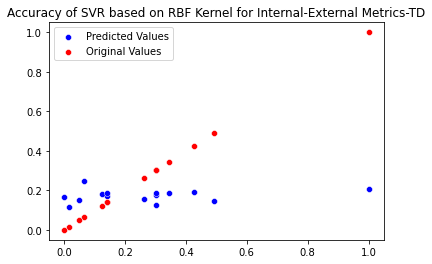


 SVR-RBF Kernel Regression R- Squared Value:  -0.09720921648004222
 SVR-RBF Kernel Regression Root Mean Squared Error:  0.2563613813817413




In [380]:
#Model for SVR (show also R-Squared Value and Root Mean Squared Error )
plt.title("Accuracy of SVR based on RBF Kernel for Internal-External Metrics-CDR")
X_train, X_test, y_train, y_test = train_test_split(x2,y2,test_size=0.30, random_state=53)
svrRegressionRBF(X_train,y_train,X_test,y_test)
plt.title("Accuracy of SVR based on RBF Kernel for Internal-External Metrics-TD")
X_train, X_test, y_train, y_test = train_test_split(x1,y1,test_size=0.30, random_state=53)
svrRegressionRBF(X_train,y_train,X_test,y_test)

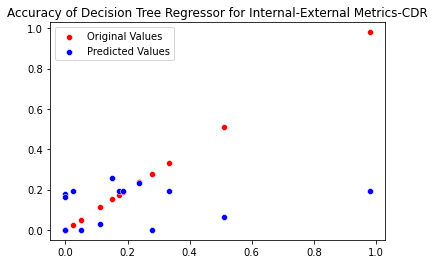

 Decision Tree Regression R- Squared Value:  -0.07118780697467852
 Decision Tree Regression Root Mean Squared Error:  0.2609438470706189




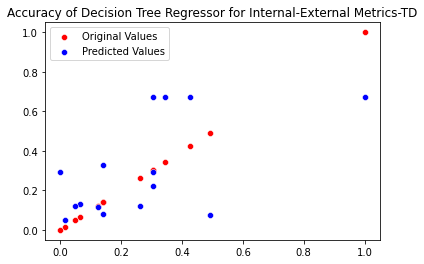

 Decision Tree Regression R- Squared Value:  0.16607675204642214
 Decision Tree Regression Root Mean Squared Error:  0.22349659972911773




In [381]:
#Model for Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error )
plt.title("Accuracy of Decision Tree Regressor for Internal-External Metrics-CDR")
X_train, X_test, y_train, y_test = train_test_split(x2,y2,train_size = 0.70,test_size=0.30, random_state=53)
decisionTreeRegression(X_train,y_train,X_test,y_test)
plt.title("Accuracy of Decision Tree Regressor for Internal-External Metrics-TD")
X_train, X_test, y_train, y_test = train_test_split(x1,y1,train_size = 0.70,test_size=0.30, random_state=53)
decisionTreeRegression(X_train,y_train,X_test,y_test)

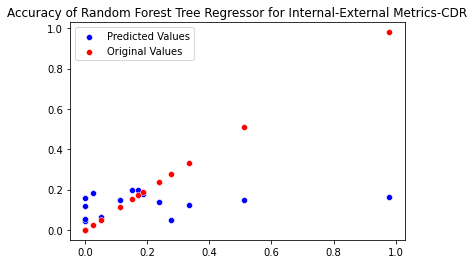

 Random Forest Regression R- Squared Value:  -0.02559850387184892
 Random Forest Regression Root Mean Squared Error:  0.2553306435659222




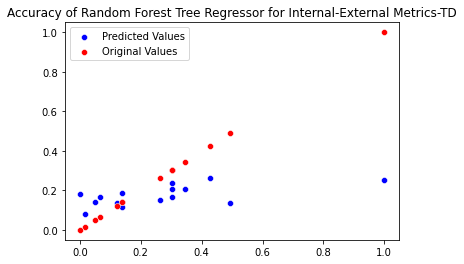

 Random Forest Regression R- Squared Value:  0.07608289879059194
 Random Forest Regression Root Mean Squared Error:  0.2352471563721988




In [382]:
#Model for Random Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error )
plt.title("Accuracy of Random Forest Tree Regressor for Internal-External Metrics-CDR")
X_train, X_test, y_train, y_test = train_test_split(x2,y2, train_size = 0.70,test_size=0.30, random_state=53)
randomDecTreeRegression(X_train,y_train,X_test,y_test) #for CDR
plt.title("Accuracy of Random Forest Tree Regressor for Internal-External Metrics-TD")
X_train, X_test, y_train, y_test = train_test_split(x1,y1, train_size = 0.70,test_size=0.30, random_state=53)
randomDecTreeRegression(X_train,y_train,X_test,y_test) #for TD

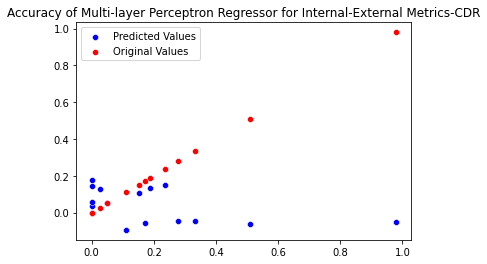

Multi-layer Perceptron Regression R- Squared Value:  -0.8980107360640979
Multi-layer Perceptron Regression Root Mean Squared Error:  0.34734702450289606




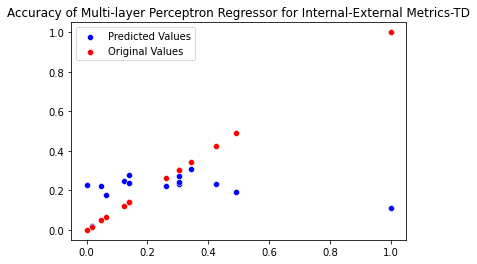

Multi-layer Perceptron Regression R- Squared Value:  -0.19436988487669282
Multi-layer Perceptron Regression Root Mean Squared Error:  0.26747136976872865




In [383]:
#Model for Multi-layer Perceptron Regressor (show also R-Squared Value and Root Mean Squared Error )
plt.title("Accuracy of Multi-layer Perceptron Regressor for Internal-External Metrics-CDR")
X_train, X_test, y_train, y_test = train_test_split(x2,y2, train_size = 0.70,test_size=0.30, random_state=53)
mlpRegressor(X_train,y_train,X_test,y_test) #for CDR
plt.title("Accuracy of Multi-layer Perceptron Regressor for Internal-External Metrics-TD")
X_train, X_test, y_train, y_test = train_test_split(x1,y1, train_size = 0.70,test_size=0.30, random_state=53)
mlpRegressor(X_train,y_train,X_test,y_test) #for TD